In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('../DataSets/adult.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.9+ MB


In [6]:
df = pd.read_csv('modified-adult-data.csv')
df.head()

,Unnamed: 0,age,workclass,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,education-num
0,0,25,Private,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,0,7
1,1,38,Private,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,0,9
2,2,28,Local-gov,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,1,12
3,3,44,Private,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,1,10
4,5,34,Private,Never-married,Other-service,White,Male,0,0,30,United-States,0,6


<IPython.core.display.Javascript object>

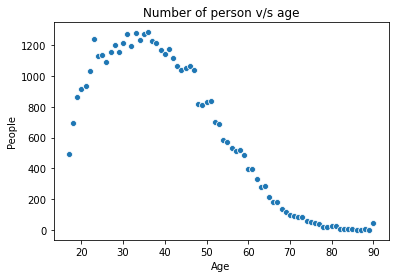

In [19]:
d = df.groupby('age')
data = d['age'].count()
sns.scatterplot(x = data.index, y = data)
plt.xlabel("Age")
plt.ylabel("People")
plt.title("Number of person v/s age")
plt.show()

In [20]:
income_df = df.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

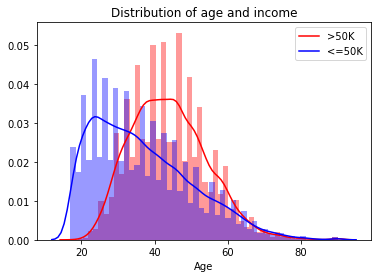

In [26]:

sns.distplot(income_df[income_df['income'] == 1]['age'], kde_kws={"label": ">50K"}, color = 'r')
sns.distplot(income_df[income_df['income'] == 0]['age'], kde_kws={"label": "<=50K"}, color = 'b')
plt.xlabel('Age')
plt.title('Distribution of age and income')
plt.show()

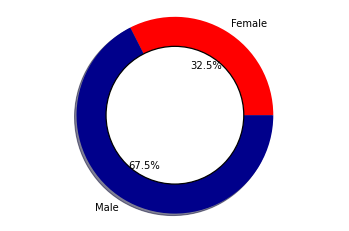

In [42]:
data = income_df.groupby('gender')['gender'].count()
colors = ['red', 'darkblue']
labels = ['Female', 'Male']
plt.pie(data, colors=colors, autopct='%1.1f%%', shadow=True, labels=labels)
centre_circle = plt.Circle((0,0),0.7,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()  

<IPython.core.display.Javascript object>

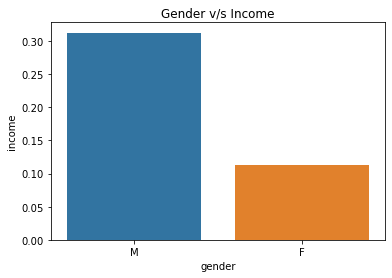

In [46]:
sns.barplot(x='gender', y='income', data=income_df, ci=0)
plt.title('Gender v/s Income')
plt.xticks([0, 1], ['M', 'F'])
plt.show()

In [49]:
data = income_df.groupby('education-num')['education-num'].count()
column = data.index
print(column)

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64', name='education-num')


<IPython.core.display.Javascript object>

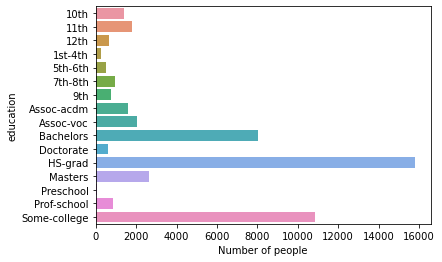

In [55]:
data = df.groupby('education')['education'].count()
col = data.index
sns.barplot(data, col, ci=0)
plt.xlabel('Number of people')
plt.show()

<IPython.core.display.Javascript object>

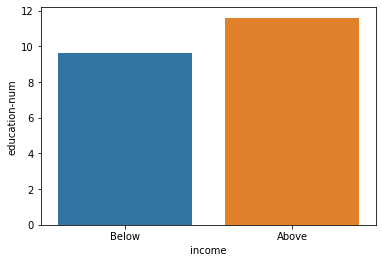

In [64]:
sns.barplot(x='income', y= 'education-num', data=income_df, ci=0)
plt.xticks([0, 1], ['Below', 'Above'])
plt.show()

In [65]:
income_df['marital-status'].replace(['Married-civ-spouse'], 'Married', inplace=True)
income_df['marital-status'].replace('Never-married', 'Not-married', inplace=True)
income_df['marital-status'].replace(['Divorced'], 'Separated', inplace=True)
income_df['marital-status'].replace(['Widowed'], 'Separated', inplace=True)
income_df['marital-status'].replace(['Separated'], 'Separated', inplace=True)
income_df['marital-status'].replace(['Married-spouse-absent'], 'Not-married', inplace=True)
income_df['marital-status'].replace(['Married-AF-spouse'], 'Married', inplace=True)
income_df['marital-status'].unique()

array(['Not-married', 'Married', 'Separated'], dtype=object)

<IPython.core.display.Javascript object>

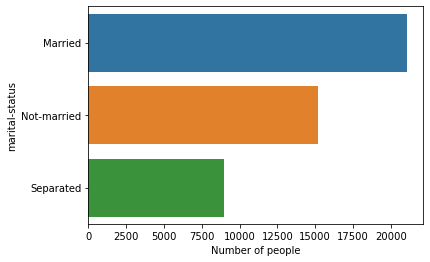

In [67]:
data = income_df.groupby('marital-status')['marital-status'].count()
col = data.index
sns.barplot(data, col, ci=0)
plt.xlabel('Number of people')
plt.show()

<IPython.core.display.Javascript object>

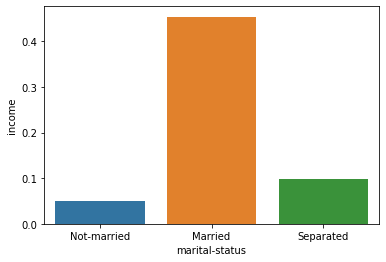

In [70]:
sns.barplot(x='marital-status', y= 'income', data=income_df, ci=0)
plt.show()

<IPython.core.display.Javascript object>

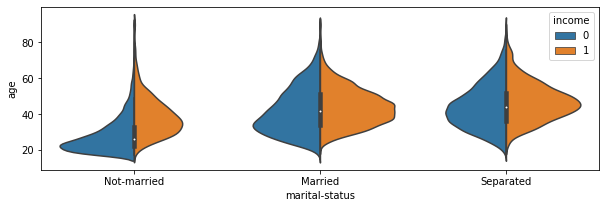

In [73]:
a4_dims = (10, 3)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x="marital-status", y="age", hue="income",
               data=income_df, gridsize=100, split=True)